This Python Notebook will simulate a data dump to the EEPROM of an MCU. This data will then be read and plotted. 

A typical scenario is that a sensor is monitoring the dynamic output of a system and an MCU is logging this data.

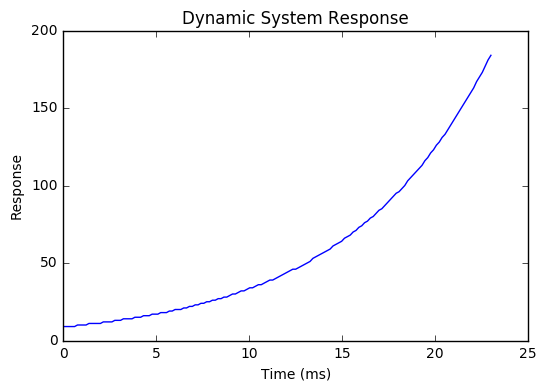

In [57]:
# Create Data For Hex File
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 2, 150)
y =  25*np.exp(x)
timescale = 23 # milliseconds;  Rate of data capture.

# Create Hex File and Fill it with the simulated data
# Simulation of writing to EEPROM of system with 256 bytes of EEPROM
from cStringIO import StringIO
from intelhex import IntelHex

ih = IntelHex() # Create empty hex file
for i in range(0,len(y)):
    ih[i] = int(y[i])
    #print i,ih[i]
    
ih[250] =  timescale

ih.tofile('foo.hex', format='hex')

# Parse the hex file and structure the data such that it can be plotted.
ih2 = IntelHex("foo.hex") #Load a hex file

y2 = np.zeros(150)
for i in range(0,150):
    y2[i] = ih2[i]
    #print ih[i]

time = np.linspace(0, timescale, 150)

plt.figure()
plt.plot(time, y2)
plt.xlabel('Time (ms)')
plt.ylabel('Response')
plt.title('Dynamic System Response')
plt.show()
